In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup
import plotly.graph_objs as go
!pip3 install chart-studio
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
from plotly.offline import iplot
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 64 kB 2.5 MB/s 


In [4]:
df = pd.read_csv('/content/NLP.csv',low_memory=False)

In [5]:
df.head()

,crid,summary,add2,city,incident_date,point,source,beat_id,is_officer_complaint,add1,location,old_complaint_address,first_end_date,first_start_date,most_common_category_id,coaccused_count,subjects,created_at,updated_at,is_extracted_summary,cr_text,id,start_date,end_date,officer_age,recc_finding,recc_outcome,final_finding,final_outcome,final_outcome_class,allegation_category_id,officer_id,disciplined,created_at.1,updated_at.1,allegation_id,id.1,category_code,category,allegation_name,on_duty,citizen_dept,created_at.2,updated_at.2
0,C181899,NaN,NaN,NaN,1986-06-02 00:00:00+00,0101000020E6100000379902E3AAEE55C0C5D3E1D7FEEA...,NaN,NaN,False,NaN,NaN,31XX S KEELER,1994-01-12,1991-01-23,159,1,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,11062,1991-01-23,1994-01-12,NaN,NaN,Unknown,SU,Separation,NaN,159,31597,True,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,C181899,159,08N,Criminal Misconduct,Conspiracy To Commit A Crime,True,citizen,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
1,1054738,NaN,S JUSTINE ST Apt: 1,CHICAGO IL 60620,2012-06-13 00:00:00+00,0101000020E6100000FA5866B650EA55C003C70A2362DC...,NaN,244.0,False,94XX,Public Way - Other,NaN,2012-09-20,2012-06-13,204,2,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,Initial / Intake Allegation 1: The complainant...,224509,2012-06-13,2012-09-20,NaN,NaN,Unknown,NaN,Unknown,NaN,204,22604,NaN,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,1054738,204,10U,Operation/Personnel Violations,Inadequate / Failure To Provide Service,True,dept,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
2,1067064,NaN,NaN,NaN,2014-01-16 00:00:00+00,NaN,NaN,224.0,False,NaN,Private Residence,NaN,2014-04-03,2014-01-16,96,3,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,232360,2014-01-16,2014-04-03,NaN,NaN,Unknown,NaN,Unknown,NaN,96,17087,NaN,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,1067064,96,04J,Lockup Procedures,Miscellaneous,True,citizen,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
3,C170725,NaN,NaN,NaN,1989-09-05 00:00:00+00,0101000020E610000036F1C4628AE655C0C29668DA0FE5...,NaN,NaN,False,NaN,NaN,9XX E 58TH STREET,1990-02-08,1989-09-05,204,1,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,3767,1989-09-05,1990-02-08,NaN,NaN,Unknown,SU,Reprimand,NaN,204,4138,True,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,C170725,204,10U,Operation/Personnel Violations,Inadequate / Failure To Provide Service,True,dept,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
4,C171736,NaN,NaN,NaN,1989-10-19 00:00:00+00,0101000020E610000087ECCDB9A5F355C0BF60376C5BF7...,NaN,NaN,False,NaN,NaN,28XX N HARLEM,1990-06-04,1989-10-19,31,1,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,5210,1989-10-19,1990-06-04,NaN,NaN,Unknown,SU,Reprimand,NaN,31,20132,True,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,C171736,31,01A,Verbal Abuse,Use Of Profanity,True,citizen,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248321 entries, 0 to 248320
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crid                     248321 non-null  object 
 1   summary                  1825 non-null    object 
 2   add2                     95796 non-null   object 
 3   city                     97779 non-null   object 
 4   incident_date            248244 non-null  object 
 5   point                    208136 non-null  object 
 6   source                   45 non-null      object 
 7   beat_id                  119019 non-null  float64
 8   is_officer_complaint     248321 non-null  bool   
 9   add1                     94212 non-null   object 
 10  location                 130345 non-null  object 
 11  old_complaint_address    110046 non-null  object 
 12  first_end_date           243020 non-null  object 
 13  first_start_date         248321 non-null  object 
 14  most

In [7]:
df.final_finding.value_counts()

NS    114166
UN     53094
SU     21989
EX     17322
NC        47
DS        12
Name: final_finding, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248321 entries, 0 to 248320
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crid                     248321 non-null  object 
 1   summary                  1825 non-null    object 
 2   add2                     95796 non-null   object 
 3   city                     97779 non-null   object 
 4   incident_date            248244 non-null  object 
 5   point                    208136 non-null  object 
 6   source                   45 non-null      object 
 7   beat_id                  119019 non-null  float64
 8   is_officer_complaint     248321 non-null  bool   
 9   add1                     94212 non-null   object 
 10  location                 130345 non-null  object 
 11  old_complaint_address    110046 non-null  object 
 12  first_end_date           243020 non-null  object 
 13  first_start_date         248321 non-null  object 
 14  most

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248321 entries, 0 to 248320
Data columns (total 44 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   crid                     248321 non-null  object 
 1   summary                  1825 non-null    object 
 2   add2                     95796 non-null   object 
 3   city                     97779 non-null   object 
 4   incident_date            248244 non-null  object 
 5   point                    208136 non-null  object 
 6   source                   45 non-null      object 
 7   beat_id                  119019 non-null  float64
 8   is_officer_complaint     248321 non-null  bool   
 9   add1                     94212 non-null   object 
 10  location                 130345 non-null  object 
 11  old_complaint_address    110046 non-null  object 
 12  first_end_date           243020 non-null  object 
 13  first_start_date         248321 non-null  object 
 14  most

In [10]:
df.head()

,crid,summary,add2,city,incident_date,point,source,beat_id,is_officer_complaint,add1,location,old_complaint_address,first_end_date,first_start_date,most_common_category_id,coaccused_count,subjects,created_at,updated_at,is_extracted_summary,cr_text,id,start_date,end_date,officer_age,recc_finding,recc_outcome,final_finding,final_outcome,final_outcome_class,allegation_category_id,officer_id,disciplined,created_at.1,updated_at.1,allegation_id,id.1,category_code,category,allegation_name,on_duty,citizen_dept,created_at.2,updated_at.2
0,C181899,NaN,NaN,NaN,1986-06-02 00:00:00+00,0101000020E6100000379902E3AAEE55C0C5D3E1D7FEEA...,NaN,NaN,False,NaN,NaN,31XX S KEELER,1994-01-12,1991-01-23,159,1,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,11062,1991-01-23,1994-01-12,NaN,NaN,Unknown,SU,Separation,NaN,159,31597,True,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,C181899,159,08N,Criminal Misconduct,Conspiracy To Commit A Crime,True,citizen,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
1,1054738,NaN,S JUSTINE ST Apt: 1,CHICAGO IL 60620,2012-06-13 00:00:00+00,0101000020E6100000FA5866B650EA55C003C70A2362DC...,NaN,244.0,False,94XX,Public Way - Other,NaN,2012-09-20,2012-06-13,204,2,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,Initial / Intake Allegation 1: The complainant...,224509,2012-06-13,2012-09-20,NaN,NaN,Unknown,NaN,Unknown,NaN,204,22604,NaN,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,1054738,204,10U,Operation/Personnel Violations,Inadequate / Failure To Provide Service,True,dept,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
2,1067064,NaN,NaN,NaN,2014-01-16 00:00:00+00,NaN,NaN,224.0,False,NaN,Private Residence,NaN,2014-04-03,2014-01-16,96,3,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,232360,2014-01-16,2014-04-03,NaN,NaN,Unknown,NaN,Unknown,NaN,96,17087,NaN,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,1067064,96,04J,Lockup Procedures,Miscellaneous,True,citizen,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
3,C170725,NaN,NaN,NaN,1989-09-05 00:00:00+00,0101000020E610000036F1C4628AE655C0C29668DA0FE5...,NaN,NaN,False,NaN,NaN,9XX E 58TH STREET,1990-02-08,1989-09-05,204,1,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,3767,1989-09-05,1990-02-08,NaN,NaN,Unknown,SU,Reprimand,NaN,204,4138,True,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,C170725,204,10U,Operation/Personnel Violations,Inadequate / Failure To Provide Service,True,dept,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00
4,C171736,NaN,NaN,NaN,1989-10-19 00:00:00+00,0101000020E610000087ECCDB9A5F355C0BF60376C5BF7...,NaN,NaN,False,NaN,NaN,28XX N HARLEM,1990-06-04,1989-10-19,31,1,NaN,2019-01-09 04:41:26.530261+00,2019-01-09 04:41:31.205347+00,False,NaN,5210,1989-10-19,1990-06-04,NaN,NaN,Unknown,SU,Reprimand,NaN,31,20132,True,2019-01-09 04:41:59.265501+00,2019-01-09 04:42:02.108401+00,C171736,31,01A,Verbal Abuse,Use Of Profanity,True,citizen,2019-01-09 04:41:36.478496+00,2019-01-09 04:41:36.629666+00


In [11]:
df = df[['crid','cr_text','final_finding','category']]


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248321 entries, 0 to 248320
Data columns (total 4 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   crid           248321 non-null  object
 1   cr_text        6222 non-null    object
 2   final_finding  206630 non-null  object
 3   category       248321 non-null  object
dtypes: object(4)
memory usage: 7.6+ MB


In [13]:
df = df[df['cr_text'].notna()]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6222 entries, 1 to 248318
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   crid           6222 non-null   object
 1   cr_text        6222 non-null   object
 2   final_finding  1591 non-null   object
 3   category       6222 non-null   object
dtypes: object(4)
memory usage: 243.0+ KB


In [15]:
def print_plot(index):
    example = df[df.index == index][['cr_text', 'category']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Category:', example[1])

In [16]:
df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['cr_text'] = df['cr_text'].apply(clean_text)

In [17]:
df['cr_text'] = df['cr_text'].str.replace('\d+', '')

In [18]:
df['cr_text'] = df['cr_text'].astype(str)

In [19]:
print_plot(10)

initial intake allegation  reporting party alleges accusedofficer failed return inventory herpurseinitial intake allegation  reporting party alleges accusedofficer failed return inventory herpurseallegation  itis alleged  sep  accused arestedcomplainant pcs without legal justificationitis alleged e accused arrestedcomplainant ustificationitis alleged arrestof complainant aited follow properinventory procedures outinedinis alleged  sep  arrestof complainant accused talled o follow properinventory procedures outlineis alleged  sep  uring arrestof complainant  follow properinventory procedures outlinedis alleged  sep  uring arrestof complainan iled follow properinventory procedures outlined ifinding  none entered
Category: Lockup Procedures


In [20]:
print_plot(100)

initial intake allegation  reporting party alleges accusedofficers arrested without justification itis alleged accused officersthreatened send victim back thejoint provide information aboutpeople neighborhood amurder alleged accusedofficers handcuffed victim placedhim cell several hoursinitial intake allegation  reporting party alleges accusedofficers arrested without justification itis alleged accused officersthreatened send victim back thejoint provide information aboutpeople neighborhood amurder alleged accusedofficers handcuffed victim placedhimin cell several hoursallegation  complainant alleged  august t  hours unknown accused arrested himwithout justificationthe complainant alleged  august  hours unknown accused threatened send topenitentiary provide information pertaining murder whileplaced cell several hoursthe complainant alleged  august  hours unknown accused knownas po laureto # th dist dtl unit  po# th dist dtl unit  arrested underwithout justificationthe complainant __lle

In [21]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['cr_text'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 22537 unique tokens.


In [22]:
X = tokenizer.texts_to_sequences(df['cr_text'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (6222, 250)


In [23]:
Y = pd.get_dummies(df['final_finding']).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (6222, 4)


In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.10, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5599, 250) (5599, 4)
(623, 250) (623, 4)


In [25]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 250, 100)          5000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 250, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 4)                 404       
                                                                 
Total params: 5,080,804
Trainable params: 5,080,804
Non-trainable params: 0
_________________________________________________________________
None


In [26]:
epochs = 10
batch_size = 64

history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
79/79 [==============================] - 62s 743ms/step - loss: 0.3414 - accuracy: 0.1643 - val_loss: 0.3479 - val_accuracy: 0.1143
Epoch 2/10
79/79 [==============================] - 59s 742ms/step - loss: 0.3384 - accuracy: 0.1062 - val_loss: 0.3460 - val_accuracy: 0.1143
Epoch 3/10
79/79 [==============================] - 59s 746ms/step - loss: 0.3384 - accuracy: 0.1062 - val_loss: 0.3462 - val_accuracy: 0.1143
Epoch 4/10
79/79 [==============================] - 59s 745ms/step - loss: 0.3380 - accuracy: 0.1062 - val_loss: 0.3463 - val_accuracy: 0.1143
Epoch 5/10
79/79 [==============================] - 59s 745ms/step - loss: 0.3381 - accuracy: 0.1062 - val_loss: 0.3452 - val_accuracy: 0.1143
Epoch 6/10
79/79 [==============================] - 59s 743ms/step - loss: 0.3379 - accuracy: 0.1062 - val_loss: 0.3443 - val_accuracy: 0.1143
Epoch 7/10
79/79 [==============================] - 59s 745ms/step - loss: 0.3378 - accuracy: 0.1062 - val_loss: 0.3455 - val_accuracy: 0.1143

In [27]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

20/20 [==============================] - 1s 67ms/step - loss: 0.3503 - accuracy: 0.1380
Test set
  Loss: 0.350
  Accuracy: 0.138


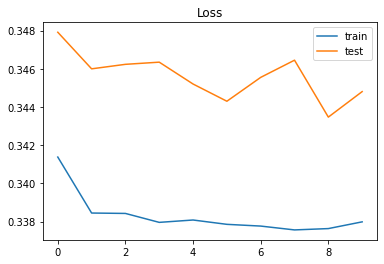

In [28]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [29]:
new_complaint = ['The police officer forcefully entered my house and planted a weapon on me']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['NS', 'UN', 'SU', 'EX','NC','DS']
print(pred, labels[np.argmax(pred)])

[[0.23494983 0.3895837  0.15206465 0.22340186]] UN
